3. Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the df and calculate the following

In [2]:
#3.1

# a. Measure the dispersion in both and interpret the results.

#soln
# dispersion - the spread of df from the central tendency such as mean or median 

# range, IQR, Variance, Standard Deviation, Mean absolute deviation
import pandas as pd
import numpy as np

df = pd.read_csv('bp_statistics.csv')

bp_before = df[' Blood Pressure Before (mmHg)']
bp_after = df[' Blood Pressure After (mmHg)']

def checkDispersion(x):
    dfset_range = max(x) - min(x)
    # variance = x.var()
    variance = sum((x - (sum(x) / len(x))) ** 2 )/ len(x)
    variance = round(variance, 2)
    #stadard_dev = x.std()
    stadard_dev = round(np.sqrt(variance),2)

    return dfset_range, variance, stadard_dev

print('the dispersion of df for Blood Pressure Before')
dfset_range, variance, stadard_dev = checkDispersion(bp_before)
print(f'range of df: {dfset_range}, variance: {variance}, stadard_dev: {stadard_dev}')

print('the dispersion of df for Blood Pressure After')
dfset_range, variance, stadard_dev = checkDispersion(bp_after)
print(f'range of df: {dfset_range}, variance: {variance}, stadard_dev: {stadard_dev}')

the dispersion of df for Blood Pressure Before
range of df: 28, variance: 43.1, stadard_dev: 6.57
the dispersion of df for Blood Pressure After
range of df: 23, variance: 46.97, stadard_dev: 6.85


5% Confidence Interval before: (132.60075849172767, 135.21924150827232)
5% Confidence Interval after: (126.99326697818071, 129.7267330218193)


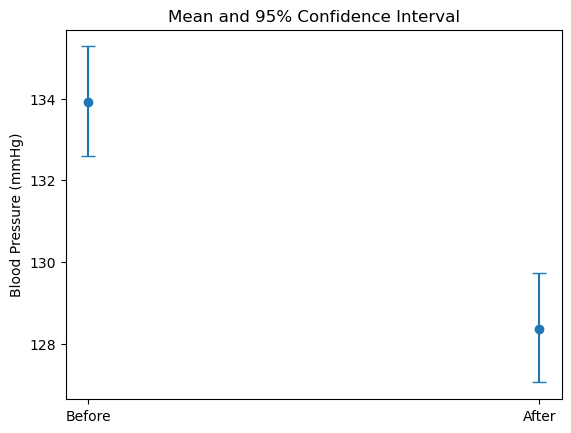

In [4]:
#3.2

# Calculate mean and 5% confidence interval and plot it in a graph
import matplotlib.pyplot as plt
from scipy import stats

mean_before =bp_before.mean()
confidence_interval_before = stats.t.interval(0.95, len(df) - 1, loc=mean_before, scale=stats.sem(bp_before))

print("5% Confidence Interval before:", confidence_interval_before)

mean_after =bp_after.mean()
confidence_interval_after = stats.t.interval(0.95, len(df) - 1, loc=mean_after, scale=stats.sem(bp_after))

print("5% Confidence Interval after:", confidence_interval_after)

plt.errorbar(x=[0, 1], y=[mean_before, mean_after], yerr=[(confidence_interval_before[1] - mean_before, mean_before - confidence_interval_before[0]),
                                                           (confidence_interval_after[1] - mean_after, mean_after - confidence_interval_after[0])],
             fmt='o', capsize=5)
plt.xticks([0, 1], ['Before', 'After'])
plt.ylabel('Blood Pressure (mmHg)')
plt.title('Mean and 95% Confidence Interval')
plt.show()

In [5]:
#3.3

# Calculate the Mean absolute deviation and Standard deviation and interpret the results.
mean_before =bp_before.mean()
mean_abs_dev_before = abs(bp_before - mean_before).mean()
print(f'the mean absolute deviation for blood pressure before is: {round(mean_abs_dev_before,2)}')
print(f'the standard deviation for blood pressure before is: {round(bp_before.std(),2)}')

mean_after =bp_after.mean()
mean_abs_dev_after = abs(bp_after - mean_after).mean()
print(f'the mean absolute deviation for blood pressure before is: {round(mean_abs_dev_after,2)}')
print(f'the standard deviation for blood pressure after is: {round(bp_after.std(),2)}')



the mean absolute deviation for blood pressure before is: 5.71
the standard deviation for blood pressure before is: 6.6
the mean absolute deviation for blood pressure before is: 5.9
the standard deviation for blood pressure after is: 6.89


In [6]:
#3.4

# Calculate the correlation coefficient and check the significance of it at 1% level of significance
from scipy.stats import pearsonr

corr, p_value =  pearsonr(bp_before, bp_after)
print("Correlation Coefficient:", corr)
print("P-value:", p_value)

if p_value < 0.01:
    print("the correlation coefficient is significant at 1% level")
else:
    print("the correlation coefficient is not significant at 1% level")


Correlation Coefficient: 0.9779485966556027
P-value: 1.8097381433033208e-68
the correlation coefficient is significant at 1% level
